In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
! pwd

/home/michele/Desktop/michele_backup_20200401/Documents/isobenefit-cities


In [ ]:
time_string = "20200510-190235"
for timestamp in:


In [34]:
import os, glob

In [40]:
timestamps = sorted(os.listdir("simulations/"))[-10:]

In [43]:
2500/80

31.25

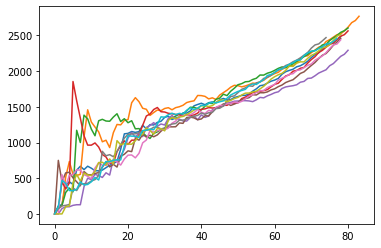

In [42]:
for timestamp in timestamps:
    df = pd.read_csv(f"simulations/{timestamp}/current_counts.csv")
    plt.plot(df.current_population/(0.2*0.2*df.current_built_blocks))

In [26]:
df = pd.read_csv("simulations/20200510-190235/current_counts.csv")

In [27]:
df.tail()

,iteration,added_blocks,added_centralities,current_built_blocks,current_centralities,current_free_nature,current_population
74,74,695,0,18326,184,21674,1720968.0
75,75,700,0,19026,184,20974,1818912.0
76,76,720,47,19747,231,20253,1891536.0
77,77,680,0,20427,231,19573,1995084.0
78,78,692,0,21119,231,18881,2098812.0


In [28]:
0.2*0.2

0.04000000000000001

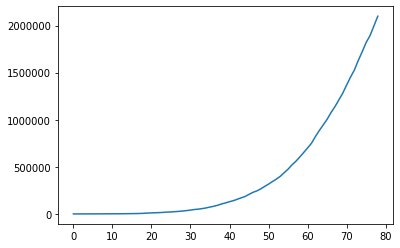

In [29]:
plt.plot(df.current_population)

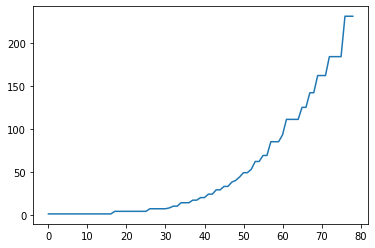

In [30]:
plt.plot(df.current_centralities)

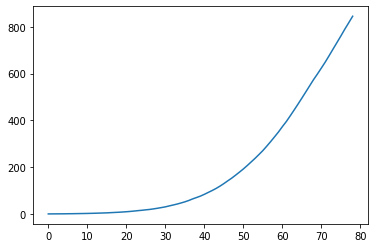

In [31]:
plt.plot((0.2*0.2*df.current_built_blocks))

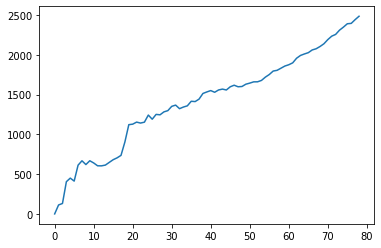

In [32]:
plt.plot(df.current_population/(0.2*0.2*df.current_built_blocks))

In [2]:
def d(x1,y1,x2,y2):
    #return abs(x1-x2) + abs(y1-y2)
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def available_land(land_map, built, x,y,amenities_coords, T=15,nat=15):
    #distances_from_centralities = [d(x,y,x_a,y_a) for x_a, y_a in centralities_coords]
    distances_from_amenities = [d(x,y,x_a,y_a) for x_a, y_a in amenities_coords]
    coords = np.mgrid[0:land_map.shape[0],0:land_map.shape[1]]
    does_not_obstruct_nature = True
    copy_land = land_map.copy()
    copy_land[x,y] = 1
    for built_point in built:
        d_built_point_from_each_in_land = np.sqrt((built_point[0]-coords[0])**2+(built_point[1]-coords[1])**2)
        distances_from_nature = np.where(copy_land == 0, d_built_point_from_each_in_land, np.inf )
        if distances_from_nature.min() > nat:
            does_not_obstruct_nature = False
        
    #before adding the point, minimum distance of built points from nature has to be less than T
    #after adding the point, minimum distance of built points from nature has to be less than T
    #per ogni punto già costruito la distanza minima da natura deve essere minore di T 
    #anche dopo aver aggiunto questo punto. Altrimenti non si aggiunge.
    return land_map[x,y] == 0 and min(distances_from_amenities) <= T and does_not_obstruct_nature

In [3]:
def d(x1,y1,x2,y2):
    #return abs(x1-x2) + abs(y1-y2)
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def available_land_local(land_map, built, x,y,amenities_coords, T=15,nat=15):
    #distances_from_centralities = [d(x,y,x_a,y_a) for x_a, y_a in centralities_coords]
    distances_from_amenities = [d(x,y,x_a,y_a) for x_a, y_a in amenities_coords]
    coords = np.mgrid[0:land_map.shape[0],0:land_map.shape[1]]
    does_not_obstruct_nature = True
    copy_land = land_map.copy()
    copy_land[x,y] = 1
    for built_point in built:
        d_built_point_from_each_in_land = np.sqrt((built_point[0]-coords[0])**2+(built_point[1]-coords[1])**2)
        distances_from_nature = np.where(copy_land == 0, d_built_point_from_each_in_land, np.inf )
        if distances_from_nature.min() > nat:
            does_not_obstruct_nature = False
        
    #before adding the point, minimum distance of built points from nature has to be less than T
    #after adding the point, minimum distance of built points from nature has to be less than T
    #per ogni punto già costruito la distanza minima da natura deve essere minore di T 
    #anche dopo aver aggiunto questo punto. Altrimenti non si aggiunge.
    return land_map[x,y] == 0 and min(distances_from_amenities) <= T and does_not_obstruct_nature

In [4]:
def available_land_vectorial(land_map, built, x,y, amenities_coords, T=15, nat=15):
    distances_from_amenities = [d(x,y,x_a,y_a) for x_a, y_a in amenities_coords]
    coords = np.stack([np.mgrid[0:land_map.shape[0],0:land_map.shape[1]] for _ in range(len(built))], axis=1)
    does_not_obstruct_nature = True
    copy_land = land_map.copy()
    copy_land[x,y] = 1
    built_array = np.array(built).T
    vec_copy_land = np.stack([copy_land for _ in range(len(built)) ], axis=0)
    d_built_point_from_each_in_land = np.sqrt(((coords - built_array[:,:,None,None])**2).sum(axis=0))
    distances_from_nature = np.where(vec_copy_land == 0, d_built_point_from_each_in_land, np.inf )
    if distances_from_nature.min() > nat:
        does_not_obstruct_nature = False
    return land_map[x,y] == 0 and min(distances_from_amenities) <= T and does_not_obstruct_nature        

In [5]:
N = 10
small_land =np.zeros((N,N))
built_points = np.array([(3,4),(6,6)])

In [6]:
built_points.T[0]

array([3, 6])

In [6]:
coords = np.stack([np.mgrid[0:N,0:N] for _ in range(3) ], axis=1)
built_point = np.array([[2,2,3],[3,2,1]])

In [7]:
built_point.shape, coords.shape, built_point[:,:,None,None].shape

((2, 3), (2, 3, 10, 10), (2, 3, 1, 1))

In [8]:
np.sqrt(((coords - built_point[:,:,None,None])**2).sum(axis=0))

array([[[ 3.60555128,  2.82842712,  2.23606798,  2.        ,
          2.23606798,  2.82842712,  3.60555128,  4.47213595,
          5.38516481,  6.32455532],
        [ 3.16227766,  2.23606798,  1.41421356,  1.        ,
          1.41421356,  2.23606798,  3.16227766,  4.12310563,
          5.09901951,  6.08276253],
        [ 3.        ,  2.        ,  1.        ,  0.        ,
          1.        ,  2.        ,  3.        ,  4.        ,
          5.        ,  6.        ],
        [ 3.16227766,  2.23606798,  1.41421356,  1.        ,
          1.41421356,  2.23606798,  3.16227766,  4.12310563,
          5.09901951,  6.08276253],
        [ 3.60555128,  2.82842712,  2.23606798,  2.        ,
          2.23606798,  2.82842712,  3.60555128,  4.47213595,
          5.38516481,  6.32455532],
        [ 4.24264069,  3.60555128,  3.16227766,  3.        ,
          3.16227766,  3.60555128,  4.24264069,  5.        ,
          5.83095189,  6.70820393],
        [ 5.        ,  4.47213595,  4.12310563,  4. 

In [24]:
coords = np.stack([np.mgrid[0:N,0:N] for _ in range(len(built_points))], axis=0)

In [26]:
coords.shape

(2, 2, 10, 10)

In [14]:
# random initialization
np.random.seed(42)

n_amenities = 20
map_size = 100
land_map = np.zeros((map_size,map_size))


amenities = np.random.randint(low=0, high=map_size, size=(2,n_amenities))
amenities_coords =[(a,b) for a,b in zip(*amenities)]

built = amenities_coords

In [49]:
# squared initialization
map_size = 50
land_map = np.zeros((map_size,map_size))
amenities_coords = [(int(25 + 10*np.sin(2*t*np.pi)),int(25 + 10*np.cos(2*t*np.pi))) for t in np.arange(0,1,0.1) ]
built = amenities_coords

In [50]:
[(25 + 10*np.sin(2*t*np.pi),25 + 10*np.cos(2*t*np.pi)) for t in np.arange(0,1,0.1) ]

[(25.0, 35.0),
 (30.877852522924734, 33.09016994374947),
 (34.510565162951536, 28.090169943749473),
 (34.510565162951536, 21.909830056250524),
 (30.877852522924734, 16.909830056250527),
 (25.0, 15.0),
 (19.122147477075266, 16.909830056250527),
 (15.489434837048465, 21.909830056250524),
 (15.489434837048464, 28.090169943749473),
 (19.122147477075266, 33.09016994374947)]

In [51]:
built

[(25, 35),
 (30, 33),
 (34, 28),
 (34, 21),
 (30, 16),
 (25, 15),
 (19, 16),
 (15, 21),
 (15, 28),
 (19, 33)]

new houses added: 40


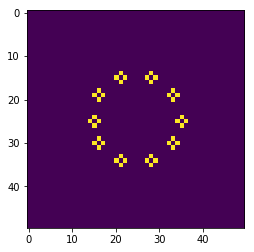

new houses added: 90


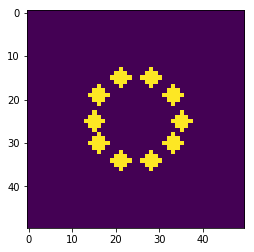

new houses added: 118


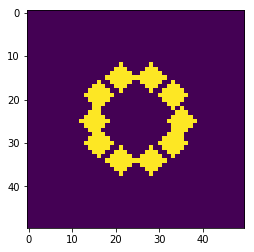

new houses added: 137


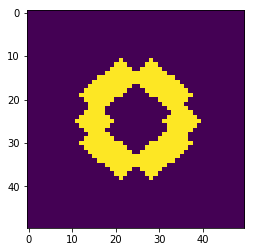

new houses added: 112


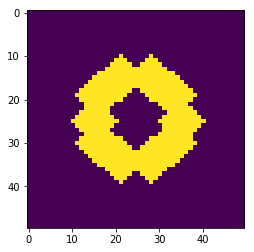

new houses added: 112


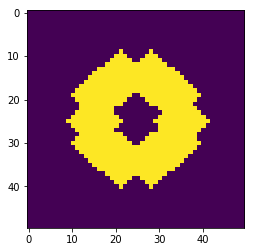

new houses added: 112


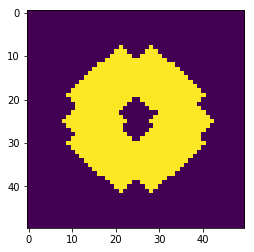

new houses added: 109


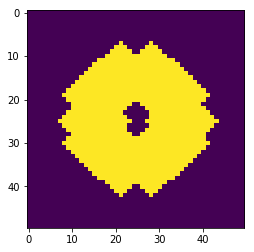

new houses added: 108


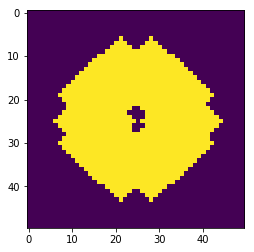

KeyboardInterrupt: 

In [52]:
probability = 1
for i in range(20):
    updated_built = []
    old_built_houses = len(built)
    for x,y in built:
        updated_built.append((x,y))
        if y+1 < map_size:
            if available_land(land_map,built, x,y+1, amenities_coords) and np.random.rand() < probability :
                land_map[x,y+1] = 1
                updated_built.append((x,y+1))
        if y-1 >= 0:
            if available_land(land_map,built, x,y-1, amenities_coords) and np.random.rand() < probability:
                land_map[x,y-1] = 1
                updated_built.append((x,y-1))
        if x+1 < map_size:
            if available_land(land_map,built, x+1,y, amenities_coords) and np.random.rand() < probability:
                land_map[x+1,y] = 1
                updated_built.append((x+1,y))
        if x-1 >= 0:
            if available_land(land_map,built, x-1,y, amenities_coords) and np.random.rand() < probability:
                land_map[x-1,y] = 1
                updated_built.append((x-1,y))
    built = updated_built
    print("new houses added: {}".format(len(built)-old_built_houses))
    plt.imshow(land_map)
    plt.show();

# circular initialization

In [ ]:
# circular initialization
map_size = 50
radius = 10
nat_dist = 10
am_dist = 10
land_map = np.zeros((map_size,map_size))
amenities_coords = [(int(25 + radius*np.sin(2*t*np.pi)),int(25 + radius*np.cos(2*t*np.pi))) for t in np.arange(0,1,0.1) ]
built = amenities_coords

new houses added: 8


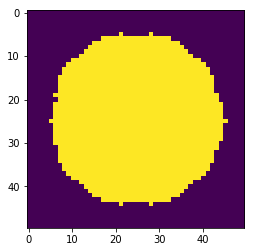

KeyboardInterrupt: 

In [57]:
probability = 1
for i in range(20):
    updated_built = []
    old_built_houses = len(built)
    for x,y in built:
        updated_built.append((x,y))
        if y+1 < map_size:
            if available_land(land_map,built, x,y+1, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability :
                land_map[x,y+1] = 1
                updated_built.append((x,y+1))
        if y-1 >= 0:
            if available_land(land_map,built, x,y-1, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x,y-1] = 1
                updated_built.append((x,y-1))
        if x+1 < map_size:
            if available_land(land_map,built, x+1,y, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x+1,y] = 1
                updated_built.append((x+1,y))
        if x-1 >= 0:
            if available_land(land_map,built, x-1,y, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x-1,y] = 1
                updated_built.append((x-1,y))
    built = updated_built
    print("new houses added: {}".format(len(built)-old_built_houses))
    plt.imshow(land_map)
    plt.show();

new houses added: 6


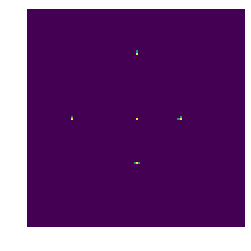

new houses added: 9


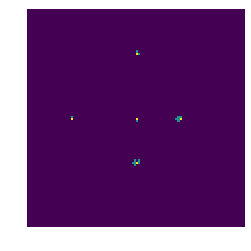

new houses added: 12


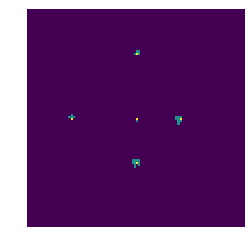

new houses added: 19


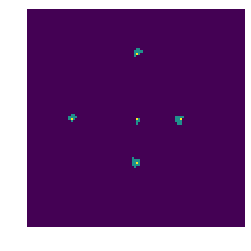

new houses added: 15


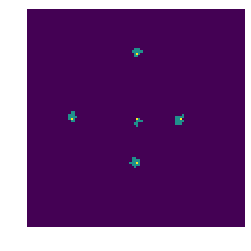

new houses added: 35


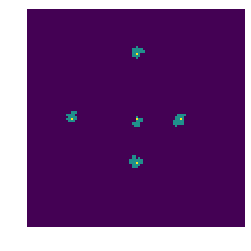

new houses added: 28


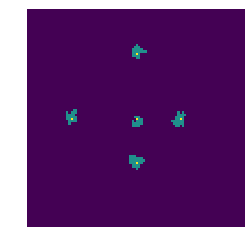

new houses added: 39


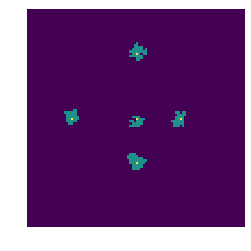

new houses added: 41


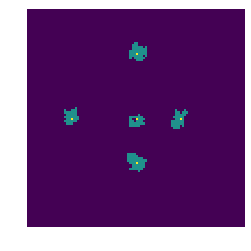

new houses added: 43


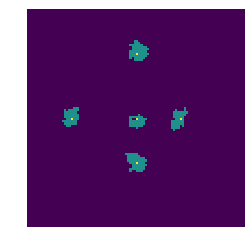

new houses added: 52


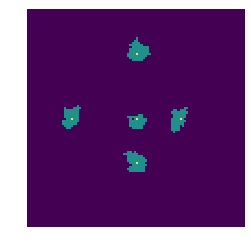

new houses added: 64


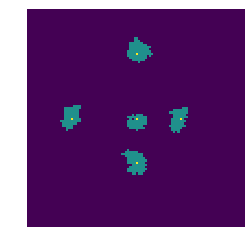

new houses added: 57


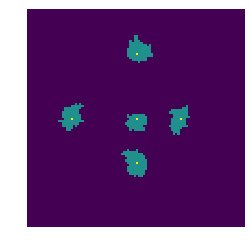

new houses added: 77


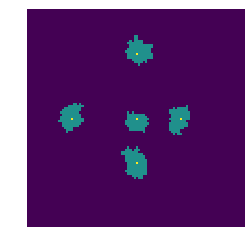

new houses added: 86


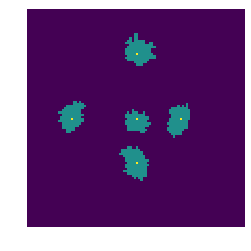

new houses added: 95


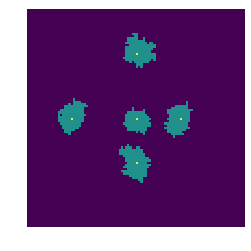

new houses added: 92


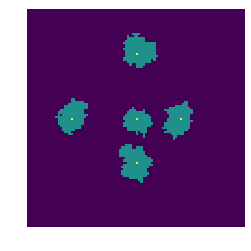

KeyboardInterrupt: 

In [10]:
#random initialization
np.random.seed(42)

n_amenities = 20
map_size = 100
land_map = np.zeros((map_size,map_size))
nat_dist = 10
am_dist = 10

amenities = np.random.randint(low=0, high=map_size, size=(2,n_amenities))
amenities_coords =[(50,50),(20,50),(50,20),(70,50),(50,70)]#[(a,b) for a,b in zip(*amenities)]
for x,y in amenities_coords:
    land_map[x,y] = 2
built = amenities_coords

probability = 0.3
for i in range(20):
    updated_built = []
    old_built_houses = len(built)
    for x,y in built:
        updated_built.append((x,y))
        if y+1 < map_size:
            if available_land(land_map,built, x,y+1, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability :
                land_map[x,y+1] = 1
                updated_built.append((x,y+1))
        if y-1 >= 0:
            if available_land(land_map,built, x,y-1, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x,y-1] = 1
                updated_built.append((x,y-1))
        if x+1 < map_size:
            if available_land(land_map,built, x+1,y, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x+1,y] = 1
                updated_built.append((x+1,y))
        if x-1 >= 0:
            if available_land(land_map,built, x-1,y, amenities_coords,nat=nat_dist,T=am_dist) and np.random.rand() < probability:
                land_map[x-1,y] = 1
                updated_built.append((x-1,y))
    built = updated_built
    print("new houses added: {}".format(len(built)-old_built_houses))
    plt.imshow(land_map)
    plt.axis('off')
    plt.savefig(f'new_low_p_step_{i}.png')
    plt.show();

## Robust implementation

In [7]:
import copy

In [8]:
def d(x1,y1,x2,y2):
    #return abs(x1-x2) + abs(y1-y2)
    return np.sqrt((x1-x2)**2+(y1-y2)**2)



class MapBlock:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.is_nature = True
        self.is_built = False
        self.is_centrality = False
        self.built_size = 0
        self.nature_size = 0
    
    def distance_from(self, block):
        return d(self.x, self.y, block.x, block.y)
    
    def set_nearest_centrality(self, centralities: list):
        centralities_distances = []
        for block in centralities:
            centralities_distances.append(self.distance_from(block))
        idx = np.argmin(np.array(centralities_distances))
        self.nearest_centrality = centralities[idx]           
    
    def set_nearest_nature_block(nature_blocks):    
        pass
   

    def get_nearest_nature_block(self):
        return self.nearest_nature_block
    
    def get_nearest_centrality(self, neighborhood):
        return self.nearest_centrality

In [92]:
class Land:
    def __init__ (self,size_x,size_y, probability=0.5, T=10, minimum_area=100, boundary_conditions='reflect'):
        self.size_x = size_x
        self.size_y = size_y
        self.T = T
        self.map = [[MapBlock(x,y) for x in range(size_y)] for y in range(size_x)]
        self.boundary_conditions = boundary_conditions
        self.minimum_area = minimum_area
        self.probability = probability
     
    def boundary_transform(self,i,j):
        if self.boundary_conditions == 'reflect':
            if i < 0:
                i = -i
            if j < 0:
                j = -j
            if i >= self.size_x:
                i = self.size_x - i%self.size_x -1
            if j >= self.size_y:
                j = self.size_y - j%self.size_y -1
                
        if self.boundary_conditions == 'periodic':
            if i < 0:
                i = self.size_x + i
            if j < 0:
                j = self.size_y + j
            if i >= self.size_x:
                i = i - self.size_x
            if j >= self.size_y:
                j = j - self.size_y
        return i,j
    
    def get_map_as_array(self):
        A = np.ones(shape=(self.size_x,self.size_y))
        for x in range(self.size_x):
            for y in range(self.size_y):
                if self.map[x][y].is_built:
                    A[x,y] = 0
        return A

    
    def set_centralities(self, centralities: list):
        for centrality in centralities:
            x,y = centrality.x, centrality.y
            self.map[x][y].is_centrality = True
            self.map[x][y].is_built = True
            self.map[x][y].is_nature = False
    
    def get_neighborhood(self,x,y):
        neighborhood = Land(2*self.T,2*self.T)
        for i in range(x-self.T,x+self.T):
            for j in range(y-self.T,y+self.T):
                i2,j2 = self.boundary_transform(i,j)
                try:
                    neighborhood.map[i + self.T - x][j + self.T - y] = self.map[i2][j2]
                except Exception as e:
                    print("i: {}, j: {}, i2: {}, j2: {}, x: {}, y: {}, T: {}".format(i,j,i2,j2,x,y,self.T))
                    raise e
        return neighborhood
    
    def is_any_neighbor_built(self,x,y):
        return (self.map[x-1][y].is_built or self.map[x+1][y].is_built or self.map[x][y-1].is_built or self.map[x][y+1].is_built)
     
    def has_centrality_nearby(self):
        for x in range(2*self.T):
            for y in range(2*self.T):
                if self.map[x][y].is_centrality:
                    if d(x,y,self.T,self.T) <= self.T:
                        return True
        return False
    
    def is_nature_extended(self,x,y):
        # this method assumes that x,y belongs to a natural region
        land_array = self.get_map_as_array()
        labels, num_features = label(land_array)
        if num_features == 1:
            return True
        elif num_features > 1:
            xy_label = labels[x,y]
            size_of_region = np.where(labels == xy_label, True, False).sum()
            #print(size_of_region)
            return size_of_region >= self.minimum_area +1
            
            
    
    
    def update_map(self):
        np.random.seed(42)
        copy_land = copy.deepcopy(self)
        for x in range(self.size_x):
            for y in range(self.size_y):
                block = self.map[x][y]
                assert (block.is_nature and not block.is_built) or (block.is_built and not block.is_nature)
                if block.is_nature:
                    neighborhood = copy_land.get_neighborhood(x,y)
                    if neighborhood.is_any_neighbor_built(self.T,self.T):
                        if neighborhood.has_centrality_nearby():
                            if self.is_nature_extended(x,y):
                                if np.random.rand() > self.probability:
                                    block.is_nature = False
                                    block.is_built = True
                        
                        

In [70]:
a = [list('aaa'), list('bbbb')]

In [71]:
a[0][2] = False

[['a', 'a', False], ['b', 'b', 'b', 'b']]

In [85]:
circular_coords = [(25 + int(10*np.sin(2*t*np.pi)),25 + int(10*np.cos(2*t*np.pi))) for t in np.arange(0,1,0.1) ]

In [93]:
circular_coords

[(25, 35),
 (30, 33),
 (34, 28),
 (34, 22),
 (30, 17),
 (25, 15),
 (20, 17),
 (16, 22),
 (16, 28),
 (20, 33)]

In [94]:
amenities = [MapBlock(x,y) for (x,y) in circular_coords]
#amenities = [MapBlock(30,30), MapBlock(50,70), MapBlock(120,30), MapBlock(50,180)]
#amenities = [MapBlock(50,50)]


In [95]:
land = Land(50,50)
        

In [96]:
land.map[30][30].is_nature

True

In [97]:
land.set_centralities(amenities)
import time

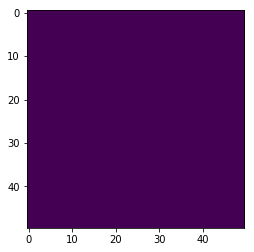

1.7187988758087158


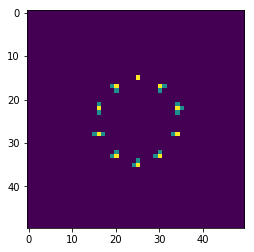

1.8335750102996826


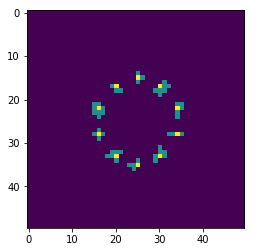

1.8364348411560059


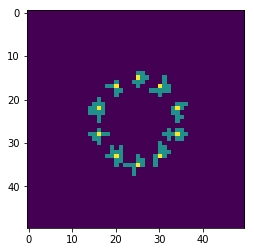

2359
2358
2357
2356
2356
2356
2356
2355
2354
2354
2354
2354
2354
2353
2352
2351
2351
2351
2350
2349
2348
2347
2347
2346
2346
2346
2346
2346
2345
2345
2344
2343
2343
2343
2342
2342
2342
2342
2342
2341
2340
2339
2338
2337
2337
2336
2335
2334
2333
2333
2333
2333
2333
2332
2331
2331
2330
2330
2330
2330
2330
2329
2.098500967025757


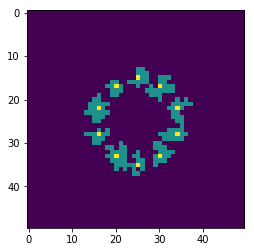

2329
2329
2328
2327
2326
2326
2326
2326
2325
2324
2323
2323
2322
2321
2321
2321
2321
2321
2320
2320
2320
2319
2319
2319
2319
2319
2318
2318
2317
2316
2316
2315
2315
2315
2314
2313
2312
2312
2312
2311
2311
2311
2311
2311
2310
2310
2308
2308
2307
2306
2306
1
2304
2303
2302
2301
2300
2299
2299
2299
2299
2299
2299
2299
2298
2298
2298
2
2295
2295
2293
2293
2292
2291
2291
2
2291
2290
2289
2288
1
2287
2287
2287
2287
2284
2283
2283
2283
2
2283
2283
2282
2281
2280
2280
2280
2279
2278
2277
2276
2276
2275
2275
2275
2275
2275
2274
2274
2272
2271
2271
2271
2270
1
2270
2270
2270
2270
2269
2268
2267
2266
2265
2265
2264
2262
2260
2259
2259
2259
2259
2259
2258
2257
2257
2
2254
2254
2254
2254
2254
2253
2253
2252
2251
2251
2250
2249
2249
2249
2249
2249
2249
2248
2247
2247
2247
2246
2246
2246
2246
2.1133267879486084


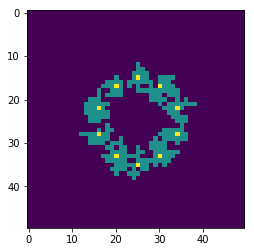

2245
2245
2244
2243
2242
2242
2242
2242
2241
2240
2239
2239
2238
2237
2237
2237
2237
2237
2236
2236
2236
2235
2235
2235
2235
2235
2234
2234
2231
2230
2230
1
2228
2228
2228
2227
2
2226
2225
2225
1
2225
2224
2224
2224
2224
2224
2223
2223
2222
2222
2221
2220
2220
2219
2218
2216
2215
1
2214
2213
2213
2213
2213
2213
2213
2213
142
142
142
2070
2070
2069
141
140
139
2
1
2069
2069
2068
139
138
137
137
2
2067
2067
137
136
1
2066
2066
2
136
136
135
2066
2065
2
134
134
133
5
5
5
2065
2064
2063
127
126
5
5
2063
2063
2063
2063
1
126
126
2061
2060
125
125
1
2060
2060
1
1
124
124
2060
2059
2
124
123
2058
2057
2057
2056
2055
2
122
2
2054
2054
2054
2054
2054
2
2053
2049
2049
2048
2048
2048
2048
2048
2047
2047
2046
2044
2044
2043
2042
2042
2042
2042
2042
2042
2041
2040
2040
1.690735101699829


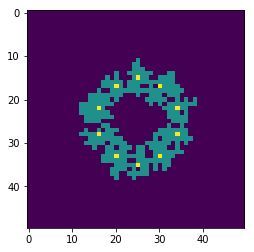

2040
2040
2039
2038
2037
2037
2037
2037
2036
2034
2033
2033
2032
1
2026
2026
5
5
2026
2026
5
5
2026
2025
2025
5
2025
2024
2024
2024
2
119
1
2024
2023
2023
2022
2
119
119
1
2021
2021
2021
2020
1
1
117
115
115
115
2018
2018
2018
114
114
113
113
1
2018
2018
2017
112
112
111
2016
2015
2014
4
4
110
109
2009
2009
2009
4
109
109
109
2
1
2009
2009
108
107
107
2
2009
2009
106
105
1
2008
2008
2007
2
105
103
102
2006
2006
2
1
102
101
5
5
5
2006
2006
2006
100
100
100
5
5
2006
2006
2004
2003
2
1
100
100
2000
2000
100
100
1
2000
1999
1998
1
1
100
100
100
1997
1996
2
100
3
1996
1995
2
2
3
3
1995
1995
1995
1995
1994
2
1994
1993
1992
1992
1
1992
1991
1991
1991
1991
1991
1990
1988
1987
1986
1985
1985
1984
1983
1982
1981
1981
1981
1981
1981
1980
2.193237066268921


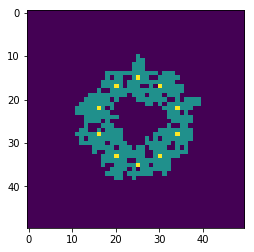

1979
1979
1978
1977
1976
1976
1976
1976
1975
1974
1973
1973
1972
1971
1
1971
1971
5
5
1971
1971
1970
5
5
1970
1970
1969
5
1969
1969
1969
1969
1968
1968
2
1
1
1967
1966
1966
1965
2
1
1
1965
1965
1962
1961
1
1
100
100
2
1960
1960
100
100
100
100
100
1
1960
1959
100
100
100
1959
1959
4
4
4
100
100
100
100
1959
1959
1957
1957
4
100
100
2
1
1956
1956
1955
100
100
2
1954
1954
100
100
1
1953
1952
2
100
100
100
1951
1950
1949
1948
2
1
100
100
5
5
5
1948
1948
2
100
100
100
5
5
1
1948
1948
2
1
100
100
1948
1948
100
100
1
1947
1947
1
1
100
100
100
1947
1946
2
100
3
1946
1945
2
2
3
3
1945
1944
1943
1943
1943
2
1942
1941
1940
1939
1939
1
1
1939
1939
1938
1937
1937
1937
1937
1937
1936
1935
1934
1934
1934
1933
1932
1931
1930
1930
1929
1929
1929
1929
1.8737549781799316


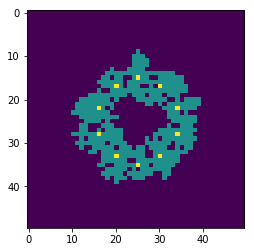

1929
1929
1928
1927
1926
1926
1926
1926
1925
1924
1923
1923
1922
1921
1921
1921
1921
1921
1
1920
1920
1920
5
5
1919
1919
1919
1919
5
5
1919
1918
1918
1917
5
1916
1916
1914
1914
1914
1913
2
1
1
1912
1911
1911
2
1
1
2
1911
1910
1
1
100
100
2
1910
1910
1910
100
100
100
100
100
1
1910
1909
100
100
100
1909
1908
4
4
4
100
100
100
100
1
1908
1907
1906
1906
4
100
100
2
1
1905
1904
100
100
2
1903
1902
100
100
1
1901
1900
2
100
100
100
1900
1900
1900
2
1
100
100
5
5
5
1900
1900
1900
1899
2
100
100
100
5
5
1
1899
1899
2
1
100
100
1896
1896
100
100
1
1895
1895
1894
1
1
100
100
100
1893
1893
2
100
3
1893
1892
2
2
3
3
1891
1890
1889
2
1889
1889
1889
1
1
1
1887
1886
1886
1886
1886
1886
1885
1884
1883
1883
1883
1882
1879
1877
1876
1876
1875
1875
1875
1875
1875
1874
1874
1873
1872
1.9048058986663818


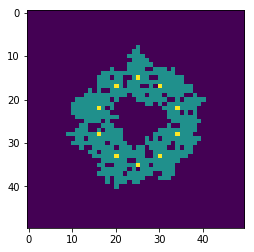

1872
1872
1871
1870
1869
1869
1869
1869
1868
1867
1866
1866
1865
1864
1864
1864
1864
1864
1863
1863
1
1863
1861
1861
5
5
1
1861
1861
1861
1860
1860
5
5
1859
1857
1857
1856
5
1
1
1856
1856
1855
2
1
1
1854
1853
1853
2
1
1
2
1853
1852
1
1
100
100
2
1852
1852
1852
1852
100
100
100
100
100
1
1851
1851
100
100
100
1850
1850
1849
1
4
4
4
100
100
100
100
1
1847
1847
1846
4
100
100
2
1
1845
1844
100
100
2
1843
1842
100
100
1
1841
1841
1841
2
100
100
100
1841
1841
2
2
1
100
100
5
5
5
1841
1841
2
2
100
100
100
5
5
1
1840
1840
2
1
100
100
1840
1838
1838
100
100
1
1
1837
1837
1
1
100
100
100
1836
1835
2
100
3
1835
1835
2
2
3
3
1834
1833
1832
2
1831
1831
1831
1831
1
1
1
1830
1829
1829
2
1829
1829
2
1
1829
1828
1827
1826
1826
1826
1825
1824
1823
1822
1822
1821
1821
1821
1821
1821
1820
1820
1819
1.6540369987487793


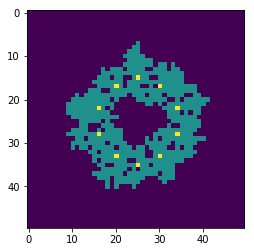

1818
1818
1817
1816
1815
1815
1815
1815
1813
1812
1811
1811
1810
1
1807
1807
2
2
1807
1807
1807
1806
1
1806
1806
1805
5
5
1
1805
1805
1805
1805
1804
5
5
1804
1803
1801
1801
1800
5
1
1
1
1800
1800
2
1
1
1799
1798
1797
2
1
1
2
1797
1797
1
1
100
100
2
1796
1796
1796
1796
100
100
100
100
100
1
1796
1795
1795
100
100
100
1794
1794
1793
1
4
4
4
100
100
100
100
1
1792
1792
4
100
100
2
1
1791
1790
100
100
2
1789
1788
100
100
1
1787
1786
1786
1786
2
100
100
100
1786
1786
2
2
1
100
100
5
5
5
1786
1786
2
2
100
100
100
5
5
1
1785
1785
1785
2
1
100
100
1784
1784
100
100
1
1
1783
1783
1
1
100
100
100
1782
1781
1781
2
100
3
1781
1780
2
2
3
3
1779
1778
2
1777
1777
1777
1777
1776
1
1
1
1775
1775
1775
1775
2
1775
1774
2
1
1773
1772
1772
1772
1771
1770
1769
1768
1768
1767
1767
1767
1767
1767
1766
1766
1765
1764
1764
1764
1763
1763
1763
1.6164090633392334


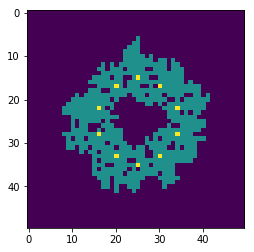

1763
1763
1762
1761
1760
1760
1760
1760
1759
1758
1757
1757
1756
1755
1755
1755
1
1755
1755
2
2
1754
1754
1754
1753
1753
1753
1
1753
1753
1752
5
5
1
1752
1751
1750
1750
1749
1749
1749
1747
5
5
1746
1745
1
5
1
1
1
1745
1745
1744
2
1
1
1744
1744
1744
2
1
1
2
1744
1743
1
1
100
100
2
1743
1742
1742
1740
1739
100
100
100
100
100
1
1739
1738
1737
1736
100
100
100
1735
1734
1733
1
4
4
4
100
100
100
100
1
1733
1733
4
100
100
2
1
1733
1733
100
100
2
1733
100
100
1
1733
1732
1732
1732
1731
2
100
100
100
1731
1730
1730
2
2
1
100
100
5
5
5
1729
1728
2
2
100
100
100
5
5
1
1728
1728
1
2
1
100
100
1726
1725
100
100
1
1
1724
1723
1723
1
1
100
100
100
1723
1723
2
2
2
100
3
1720
1719
2
2
3
3
1719
1719
2
1719
1719
1718
1717
1716
1
1
1
1716
1716
1715
1714
1713
1
2
1711
1711
2
1
1710
1710
1710
1710
1710
1709
1709
1707
1706
1706
1706
1705
1705
1705
1705
1705
1703
1702
1701
1700
1699
1699
1698
1697
1696
1695
1695
1.609203815460205


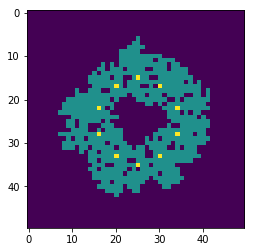

1695
1695
1694
1693
1692
1692
1692
1692
1691
1689
1688
1688
1686
1685
1685
1
1
1685
1685
1685
1
1684
1684
2
2
1684
1683
1683
1683
1683
1683
1682
1
1682
1681
1680
1680
1679
1679
5
5
1
1679
1678
1677
1676
5
5
1676
1676
1675
1
5
1
1
1
1675
1675
1675
2
1
1
1675
1674
1674
2
1
1
2
1673
1673
1
1
100
100
2
1
1672
1671
1671
2
2
100
100
100
100
100
1
1668
1667
100
100
100
1666
1665
1
4
4
4
100
100
100
100
1
1664
1663
1663
4
100
100
2
1
1663
1663
100
100
2
1663
100
100
1
1663
1663
1662
1662
2
100
100
100
1662
1661
1661
1660
2
2
1
100
100
5
5
5
1660
1659
2
2
100
100
100
5
5
1
1656
1656
1
2
1
100
100
1656
1655
100
100
1
1
1654
1653
1
1
100
100
100
1652
1652
2
2
2
100
3
1652
1652
2
2
3
3
1651
1650
2
1650
1650
1650
1
1
1
1650
1648
1647
1646
1646
1
2
1646
1645
1644
1643
2
1
1642
1642
1
1
1640
1640
1
1640
1640
1640
1639
1639
2
2
1636
1635
1635
1635
1634
1634
1634
1634
1634
1633
1632
1631
1630
1629
1629
1628
1627
1.7432889938354492


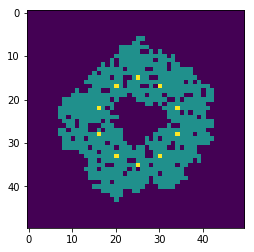

1626
1626
1625
1624
1622
1622
1622
1622
1
1621
1620
1
1
1619
1619
1
1618
1617
2
2
1617
1617
1617
1617
1616
1616
1616
1614
1
1614
1614
1614
1614
1613
1
5
5
1
1613
1610
1609
5
5
2
1609
1608
1
5
1
1
1
2
1608
1608
2
1
1
1607
1606
1
2
1
1
2
1604
1604
1
1
100
100
2
1
1604
1603
1603
2
2
100
100
100
100
100
1
1603
100
100
100
1603
1603
1
4
4
4
100
100
100
100
1
1602
1602
1601
4
100
100
2
1
1601
1599
100
100
2
1598
100
100
1
1598
1597
2
2
100
100
100
1596
1595
1594
2
2
2
1
100
100
5
5
5
1593
1592
2
2
100
100
100
5
5
1
1592
1592
1592
1
2
1
100
100
1592
1592
100
100
1
1
1592
1591
1
1
100
100
100
1591
1591
2
2
2
100
3
1590
1590
2
2
3
3
1589
1589
1588
2
1
1587
1587
1
1
1
1587
1586
1
2
1585
1584
1583
1583
2
1
1583
1583
1582
1581
1
1
1581
1581
1
1581
1581
1580
1579
2
2
1578
1578
1578
1577
1576
1575
1574
1574
1573
1573
1573
1573
1573
1571
1571
1570
1569
1569
1569
1568
1568
1568
1.7857890129089355


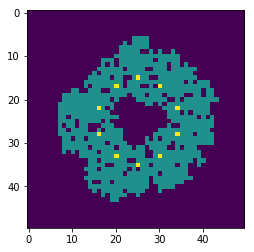

1568
1568
1567
1566
1565
1565
1565
1
1565
1564
1
1
1563
1562
1
1562
1561
2
2
1560
1560
1560
1560
1560
1558
1558
1558
1557
1
1
1557
1557
1557
1557
1556
1556
1
5
5
1
1555
1554
5
5
2
1554
1553
1
5
1
1
1
2
1553
1553
1551
2
1
1
1550
1
2
1
1
2
1549
1549
1
1
100
100
2
1
1549
1548
2
2
100
100
100
100
100
1
1548
100
100
100
1548
1548
1
4
4
4
100
100
100
100
1
1
1548
1547
1547
4
100
100
2
1
1546
100
100
2
1546
100
100
1
1545
2
2
100
100
100
1544
2
2
2
1
100
100
5
5
5
1544
1543
1542
1541
2
2
100
100
100
5
5
1
1540
1539
1538
1538
1
2
1
100
100
1538
1538
1538
100
100
1
1
1538
1538
1
1
100
100
100
1537
1537
2
2
2
100
3
1537
1536
2
2
3
3
1536
1535
2
1
1535
1534
1533
1533
1
1
1
1533
1532
1
2
1529
1528
2
1
1527
1527
1527
1527
1526
1525
1
1
1525
1525
1525
1525
1524
1
1523
1522
1522
2
2
1522
1521
1520
1519
1518
1
1518
1517
1517
1517
1517
1517
1516
1516
1515
1514
1514
1514
1512
1512
1512
1512
1512
1511
1.8314628601074219


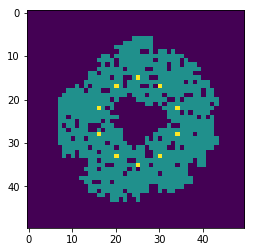

1510
1510
1509
1508
1
1507
1507
1
1
1507
1507
1
1506
1505
2
2
1504
1504
1502
1
1500
1500
1500
1500
1500
1499
1
1
1499
1499
1498
1498
1498
1
5
5
1
1498
1498
5
5
2
1497
1497
1
5
1
1
1
2
1
1496
2
1
1
1495
1
2
1
1
2
1495
1494
1494
1
1
100
100
2
1
1494
1493
2
2
100
100
100
100
100
1
1492
100
100
100
1491
1491
1
4
4
4
100
100
100
100
1
1
1491
1490
4
100
100
2
1
1490
1490
100
100
2
1490
100
100
1
1490
2
2
100
100
100
1489
1489
2
2
2
1
100
100
5
5
5
1488
2
2
100
100
100
5
5
1
1488
1487
1486
1486
1485
1
1
2
1
100
100
1483
1482
1481
100
100
1
1
1480
1479
1
1
100
100
100
1479
1479
2
2
2
100
3
1479
1479
2
2
3
3
1479
1479
2
1
1478
1478
2
2
1
1
1
1478
1477
1
2
1477
1476
2
1
1476
1475
1474
1474
1474
1473
1
1
1472
1471
1470
1470
1470
1
1470
1469
2
2
1468
1468
1
1468
1468
1468
1467
1466
1465
1
1465
1465
1464
1463
1462
1461
1461
1460
1460
1460
1460
1.5787091255187988


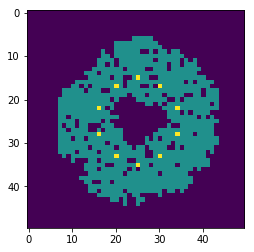

1460
1460
1459
1
1458
1457
1
1
1457
1457
1457
1
1456
1455
2
2
1
1454
1454
2
1
1451
1449
1449
1449
1449
1449
2
1
1
1
1448
1448
1448
1
5
5
1
1447
1447
5
5
2
1447
1447
1
5
1
1
1
2
1
1447
2
1
1
1446
1
2
1
1
2
1446
1445
1444
1444
1
1
100
100
2
1
2
2
100
100
100
100
100
1
1443
100
100
100
1443
1443
1441
1
4
4
4
100
100
100
100
1
1
1440
4
100
100
2
1
1439
1439
1439
100
100
2
1438
1438
100
100
1
1438
2
2
100
100
100
1438
1438
2
2
2
1
100
100
5
5
5
1437
1437
2
2
100
100
100
5
5
1
1436
1436
1
1
2
1
100
100
1435
1434
100
100
1
1
1434
1433
1
1
100
100
100
1432
1431
1430
2
2
2
100
3
1429
1428
2
2
3
3
1428
1428
2
1
1428
1428
2
2
1
1
1
1428
1
2
1428
1427
2
1
1427
1427
1
1
1426
1426
1425
1425
1
1424
1420
2
2
1420
1420
1
1419
1418
1417
1
1416
1416
1416
1416
1414
1413
1413
1413
1413
1413
1412
1.7248530387878418


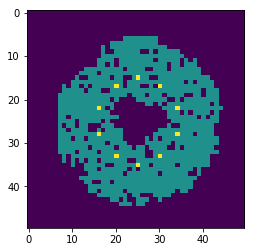

1411
1411
1
1410
1
1
1
1408
1407
1407
1407
1
1407
1406
2
2
1
1405
1404
1404
2
1
1403
1402
1402
1402
1402
2
1
1
1
1402
1401
1401
1
5
5
1
1401
1400
5
5
2
1400
1400
1400
1
5
1
1
1
2
1
2
1
1
1400
2
1
2
1
1
2
2
1
1
100
100
2
1
2
2
100
100
100
100
100
1
1397
100
100
100
1
1
4
4
4
100
100
100
100
1
1
4
100
100
2
1
1397
1396
100
100
2
1395
1395
100
100
1
1393
2
2
100
100
100
1393
2
2
2
1
100
100
5
5
5
1393
1391
2
2
100
100
100
5
5
1
1390
1389
1
1
2
1
100
100
1389
1389
100
100
1
1
1388
1
1
100
100
100
1388
1388
2
2
2
100
3
1388
2
2
3
3
1388
1387
2
1
1387
1386
2
2
1
1
1
1386
1
2
1385
2
1
3
1
1
3
3
1384
1
1384
2
2
1383
1
1
1
1382
1381
1380
1379
1378
1378
1.4626038074493408


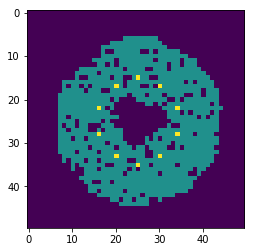

1378
1
1378
1
1
1
1377
1376
1375
1375
1
1375
2
2
1
1375
1374
1373
2
1
1372
1372
1370
1369
2
1
1
1
1369
1369
1369
1
5
5
1
1369
1368
5
5
2
1368
1368
1
1
5
1
1
1
2
1
2
1
1
2
1
2
1
1
2
2
1
1
100
100
2
1
2
2
100
100
100
100
100
1
1366
100
100
100
1
1
4
4
4
100
100
100
100
1
1
4
100
100
2
1
100
100
2
1
100
100
1
1366
2
2
100
100
100
1
2
2
2
1
100
100
5
5
5
2
2
100
100
100
5
5
1
1366
1366
1
1
2
1
100
100
1366
100
100
1
1
1365
1
1
100
100
100
1365
1364
2
2
2
100
3
1363
2
2
3
3
1363
2
1
1362
1362
2
2
1
1
1
1362
1
2
1361
2
1
3
1
1
3
3
1360
1
2
2
1
1
1
1359
1359
1.4238910675048828


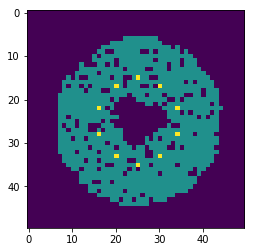

1359
1
1
1
1
1359
1
1
1357
2
2
1
1356
1355
2
1
1
1355
2
1
1
1
1355
1355
1354
1353
1
5
5
1
1351
1
5
5
2
1351
1
1
5
1
1
1
2
1
2
1
1
2
1
2
1
1
2
2
1
1
100
100
2
1
2
2
100
100
100
100
100
1
1350
100
100
100
1
1
4
4
4
100
100
100
100
1
1
4
100
100
2
1
100
100
2
1
100
100
1
1349
2
2
100
100
100
1
2
2
2
1
100
100
5
5
5
2
2
100
100
100
5
5
1
1349
1349
1
1
2
1
100
100
1349
100
100
1
1
1349
1
1
100
100
100
2
2
2
100
3
1348
2
2
3
3
2
1
1348
1348
2
2
1
1
1
1
2
2
1
3
1
1
3
3
1
2
2
1
1
1
1347
1347
1.686777114868164


In [98]:
plotted = np.zeros(shape=(land.size_x, land.size_y))
for i in range(20):   
    plt.imshow(plotted)
    plt.show()
    start = time.time()
    land.update_map()
    print( time.time() - start)
    for row in land.map:
        for block in row:
            if block.is_built:
                plotted[block.x,block.y] = 1
            if block.is_centrality:
                plotted[block.x,block.y] = 2

    

# experiment image labelling scipy

In [23]:
from scipy.ndimage.measurements import label

In [57]:
A = np.ones(shape=(20,20))

In [58]:
A[3:6,3:6] = 0
A[3:6,9:15] = 0
A[9:15,3:6] = 0
A[9:15,9:15] = 0

In [59]:
labels, features =  label(A)

In [68]:
np.where(labels == 1, True, False).sum()

319

In [131]:
for row in land.map:
    for block in row:
        if block.is_built:
            print(block.x, block.y)

46 41
47 41
48 41
49 41
50 41
51 41
52 41
53 41
54 41
44 42
45 42
46 42
47 42
48 42
49 42
50 42
51 42
52 42
53 42
54 42
55 42
56 42
43 43
44 43
45 43
46 43
47 43
48 43
49 43
50 43
51 43
52 43
53 43
54 43
55 43
56 43
57 43
42 44
43 44
44 44
45 44
46 44
47 44
48 44
49 44
50 44
51 44
52 44
53 44
54 44
55 44
56 44
57 44
58 44
42 45
43 45
44 45
45 45
46 45
47 45
48 45
49 45
50 45
51 45
52 45
53 45
54 45
55 45
56 45
57 45
58 45
41 46
42 46
43 46
44 46
45 46
46 46
47 46
48 46
49 46
50 46
51 46
52 46
53 46
54 46
55 46
56 46
57 46
58 46
59 46
41 47
42 47
43 47
44 47
45 47
46 47
47 47
48 47
49 47
50 47
51 47
52 47
53 47
54 47
55 47
56 47
57 47
58 47
59 47
41 48
42 48
43 48
44 48
45 48
46 48
47 48
48 48
49 48
50 48
51 48
52 48
53 48
54 48
55 48
56 48
57 48
58 48
59 48
41 49
42 49
43 49
44 49
45 49
46 49
47 49
48 49
49 49
50 49
51 49
52 49
53 49
54 49
55 49
56 49
57 49
58 49
59 49
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 5

In [108]:
land.update_map()

In [109]:
count = 0
for row in land.map:
    for block in row:
        if block.is_built:
            count+=1
            print(block.x, block.y)

0 0
2 0
4 0
6 0
8 0
1 1
3 1
5 1
7 1
9 1
0 2
2 2
4 2
6 2
8 2
1 3
3 3
5 3
7 3
9 3
0 4
2 4
4 4
6 4
8 4
1 5
3 5
5 5
7 5
9 5
0 6
2 6
4 6
6 6
8 6
1 7
3 7
5 7
7 7
9 7
0 8
2 8
4 8
6 8
8 8
1 9
3 9
5 9
7 9
9 9


In [110]:
print(count)

50


In [8]:
for row in land.map:
    for block in row:
        block.set_nearest_centrality(amenities)

In [9]:
for row in land.map:
    for block in row:
        print(block.x, block.y, block.nearest_centrality.x,block.nearest_centrality.y)

0 0 3 3
1 0 3 3
2 0 3 3
3 0 3 3
4 0 3 3
5 0 3 3
6 0 3 3
7 0 3 3
8 0 3 3
9 0 5 5
0 1 3 3
1 1 3 3
2 1 3 3
3 1 3 3
4 1 3 3
5 1 3 3
6 1 3 3
7 1 3 3
8 1 5 5
9 1 5 5
0 2 3 3
1 2 3 3
2 2 3 3
3 2 3 3
4 2 3 3
5 2 3 3
6 2 3 3
7 2 5 5
8 2 5 5
9 2 5 5
0 3 3 3
1 3 3 3
2 3 3 3
3 3 3 3
4 3 3 3
5 3 3 3
6 3 5 5
7 3 5 5
8 3 5 5
9 3 5 5
0 4 3 3
1 4 3 3
2 4 3 3
3 4 3 3
4 4 3 3
5 4 5 5
6 4 5 5
7 4 5 5
8 4 5 5
9 4 5 5
0 5 3 3
1 5 3 3
2 5 3 3
3 5 3 3
4 5 5 5
5 5 5 5
6 5 5 5
7 5 5 5
8 5 5 5
9 5 5 5
0 6 3 3
1 6 3 3
2 6 3 3
3 6 5 5
4 6 5 5
5 6 5 5
6 6 5 5
7 6 5 5
8 6 5 5
9 6 5 5
0 7 3 3
1 7 3 3
2 7 5 5
3 7 5 5
4 7 5 5
5 7 5 5
6 7 5 5
7 7 5 5
8 7 5 5
9 7 5 5
0 8 3 3
1 8 5 5
2 8 5 5
3 8 5 5
4 8 5 5
5 8 5 5
6 8 5 5
7 8 5 5
8 8 5 5
9 8 5 5
0 9 5 5
1 9 5 5
2 9 5 5
3 9 5 5
4 9 5 5
5 9 5 5
6 9 5 5
7 9 5 5
8 9 5 5
9 9 5 5


In [10]:
neigh = land.get_neighborhood(6,6)